## Insulin drug data analysis

### Gather

In [1]:
import pandas as pd
import numpy as np

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

In [3]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [4]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [74]:
sum(patients.given_name.duplicated())

33

In [99]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [88]:
patients.given_name.drop_duplicates()

0           Zoe
1        Pamela
2           Jae
3          Liêm
4           Tim
         ...   
497    Masataka
499       Ruman
500       Jinke
501     Chidalu
502         Pat
Name: given_name, Length: 470, dtype: object

In [79]:
patients.given_name.isna().sum()

0

In [86]:
patients.dropna().count()

patient_id      491
assigned_sex    491
given_name      491
surname         491
address         491
city            491
state           491
zip_code        491
country         491
contact         491
birthdate       491
weight          491
height          491
bmi             491
dtype: int64

In [5]:
patients.city.unique()

array(['Rancho California', 'Armstrong', 'York', 'Woodbridge', 'Dothan',
       'Daytona Beach', 'Burbank', 'Morgan Hill', 'Kansas City',
       'New York', 'Rudyard', 'Brentwood', 'Lynchburg', 'Birmingham',
       'Tulsa', 'Kingsport', 'Fresno', 'Smyrna', 'Ekalaka', 'Oroville',
       'Whitman', 'Elmsford', 'Pleasantville', 'Winter Haven',
       'Port Jervis', 'Albuquerque', 'Peoria', 'Venice',
       'Fort Washington', 'Englewood', 'Bluff City', 'Long Beach',
       'Dekalb', 'Orrington', 'Eau Claire', 'Huron', 'Westborough',
       'Walpole', 'Atlanta', 'Danube', 'West Palm Beach', 'Mountain View',
       'Waterville', 'Adamsville', 'Pittsburgh', 'Lombard', 'Maumee',
       'Wilkes Barre', 'Davenport', 'Urbandale', 'Franklin', 'Burlington',
       'Las Vegas', 'Eatonton', 'La Mesa', 'Wilson', 'San Diego',
       'Bakersfield', 'Belmont', 'Syracuse', 'Rossville', 'Marlboro',
       'Milwaukee', 'Athens', 'Hartford', 'Metairie', 'Foxboro',
       'Fremont', 'Minneapolis', 'Lexington'

In [110]:
patients.birthdate = pd.to_datetime(patients.birthdate)
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    object        
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    object        
 7   zip_code      491 non-null    float64       
 8   country       491 non-null    object        
 9   contact       491 non-null    object        
 10  birthdate     503 non-null    datetime64[ns]
 11  weight        503 non-null    float64       
 12  height        503 non-null    int64         
 13  bmi           503 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 55.1+ KB


In [107]:
patients.birthdate.value_counts()

1975-01-01    6
1954-05-03    2
1938-03-25    2
1985-08-01    2
1959-04-10    2
             ..
1992-09-29    1
1967-04-21    1
1969-05-21    1
1928-10-11    1
1952-02-13    1
Name: birthdate, Length: 493, dtype: int64

In [6]:
patients.nunique()

patient_id      503
assigned_sex      2
given_name      470
surname         466
address         483
city            349
state            54
zip_code        430
country           1
contact         483
birthdate       493
weight          347
height           22
bmi             183
dtype: int64

In [7]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [8]:
treatments.count()

given_name      280
surname         280
auralin         280
novodra         280
hba1c_start     280
hba1c_end       280
hba1c_change    171
dtype: int64

In [9]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [10]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


### Assessment - quality issue
patients table: 
* zip code data type incorrect due to string float conversion
* zip code padding zero issue, wrong number of digits
* wrong height data e.g. 27in, data anomaly
* inconsistent State data e.g.fullname vs abbv.
* name typo,  given_name for the patient with the patient_id 9, Dsvid Gustafsson
* Missing demographic information ('address' to 'contact' columns)with null values, missing entries null values
* Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
* Multiple phone number formats
* Default John Doe data
* Multiple records for Jakobsen, Gersten, Taylor
* kgs instead of lbs for Zaitseva weight

treatments table:
* missing value NaN in HbA1c change
* letter 'u' next to the start dose and end dose in the auralin and novodra columns, data type should be integers
* lowercase given name & surname
* missing record count(only 280 instead of 350)
* hba1c_change column missing record(only 171)
* Erroneous datatypes (auralin and novodra columns)
* Inaccurate HbA1c changes (4s mistaken as 9s) inaccurate value
* Nulls represented as dashes (-) in auralin and novodra columns

adverse_reactions table:
* lowercase for given name & surname

In [11]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
149,muhammad,holden,29u - 37u,-,7.55,7.09,NaN
274,naja,enoksen,43u - 50u,-,7.98,7.59,NaN
48,zak,kelly,-,38u - 38u,7.66,7.26,NaN
225,liêm,phan,-,43u - 48u,7.58,7.10,0.98
33,cannan,cabrera,-,40u - 31u,7.94,7.58,NaN


In [12]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [13]:
# show reaction values count
adverse_reactions.adverse_reaction.value_counts()['cough']

2

In [14]:
patients['city'].value_counts()

New York         18
San Diego         8
Tulsa             7
Atlanta           6
Houston           6
                 ..
Yazoo City        1
Olathe            1
Winnsboro         1
Chester           1
Overland Park     1
Name: city, Length: 349, dtype: int64

In [15]:
patients.address.value_counts()

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

In [16]:
# check count of specific city of patient
patients[patients['city']=='San Diego'].city.count()

8

In [17]:
patients.count()

patient_id      503
assigned_sex    503
given_name      503
surname         503
address         491
city            491
state           491
zip_code        491
country         491
contact         491
birthdate       503
weight          503
height          503
bmi             503
dtype: int64

In [18]:
# check null value in address field
patients[patients['address'].isnull()].sum()['address']

0

In [19]:
# check null value in contact field
patients['contact'].isnull().sum()

12

In [20]:
# check duplicates
patients[patients.address.duplicated()].count()

patient_id      19
assigned_sex    19
given_name      19
surname         19
address          8
city             8
state            8
zip_code         8
country          8
contact          8
birthdate       19
weight          19
height          19
bmi             19
dtype: int64

In [21]:
# check duplicates name
patients[patients.given_name.duplicated()].given_name

69        Joseph
72         Søren
104       Yasmin
109      Stephen
115     Caroline
153         John
188        Søren
215         John
229         John
230    Elisabeth
237         John
242         John
244         John
251         John
262      Rebecca
277         John
282        Sandy
325         Sara
332         Abel
341      Fatimah
365       Robert
375        Sofia
386      Sargent
394         Anja
403       Robert
417       Xiuxiu
433          Leo
440        David
470     Muhammad
472        Julia
481      Michael
496    Alexander
498      Mustafa
Name: given_name, dtype: object

In [22]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [23]:
sum(treatments.auralin.isnull())

0

In [24]:
sum(treatments.novodra.isnull())

0

In [25]:
treatments.auralin.value_counts()

-            143
31u - 38u      3
29u - 37u      3
32u - 42u      2
42u - 49u      2
            ... 
53u - 64u      1
25u - 31u      1
39u - 45u      1
31u - 45u      1
53u - 56u      1
Name: auralin, Length: 121, dtype: int64

In [26]:
# count number of records where patient from new york
len(patients.loc[patients['city'] == 'New York'])

18

In [27]:
patients.loc[:,'given_name':'city']

,given_name,surname,address,city
0,Zoe,Wellish,576 Brown Bear Drive,Rancho California
1,Pamela,Hill,2370 University Hill Road,Armstrong
2,Jae,Debord,1493 Poling Farm Road,York
3,Liêm,Phan,2335 Webster Street,Woodbridge
4,Tim,Neudorf,1428 Turkey Pen Lane,Dothan
...,...,...,...,...
498,Mustafa,Lindström,2530 Victoria Court,Milton Mills
499,Ruman,Bisliev,494 Clarksburg Park Road,Sedona
500,Jinke,de Keizer,649 Nutter Street,Overland Park
501,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle


In [28]:
patients.iloc[:,:10]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de
...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060


In [29]:
import numpy as np
# create the standard errors dataframe
df_SE = patients.iloc[:, np.r_[:2, 12:]]
df_SE.head()

,patient_id,assigned_sex,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight
0,1,female,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7
1,2,female,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8
2,3,male,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8
3,4,male,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9
4,5,male,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3


In [30]:
# duplicated surname
patients[patients['surname']=='Doe'].surname.count()

6

In [31]:
# weight of the record with data validity issue
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / ( height_in * height_in )
print(bmi_check)

210    19.055827
dtype: float64


In [32]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

### Tidiness issue

* Contact column in patients table should be split into phone number & email address
* variables in columns of Treatments of table - treatment(auralin & novodra), start dose, end dose
* Adverse reaction join with treatments table
* Given name and surname columns in patients table duplicated in treatments and adverse_reactions tables

In [33]:
# check duplicated columns across tables as series,combine patients and treatments tables for patient info
all_columns = pd.Series(list(patients)+list(treatments)+list(adverse_reactions))
all_columns[all_columns.duplicated()==True]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [34]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


### Cleaning

In [35]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

In [36]:
# Issue 1  - Define: Convert zip code column's data type from float to string type
# convert to string & zero padding to 5 char
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5,fillchar = '0')
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

In [37]:
patients[patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [38]:
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [39]:
# issue 2: missing data
# Define: Treatments table Missing records (280 instead of 350)
# concatenate treatments_cut with the original treatments DataFrame
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_cut.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [40]:
treatments_clean = pd.concat([treatments,treatments_cut],ignore_index=True)
treatments_clean.count()

given_name      350
surname         350
auralin         350
novodra         350
hba1c_start     350
hba1c_end       350
hba1c_change    213
dtype: int64

In [41]:
# issue 3 - treatments: Missing HbA1c changes and inaccurate HbA1c changes (leading 4s mistaken as 9s)
treatments.hba1c_change.value_counts()

0.39    17
0.35    12
0.33    12
0.38    11
0.37    11
0.36    10
0.92    10
0.34     9
0.97     8
0.93     7
0.90     6
0.30     6
0.32     6
0.95     5
0.96     5
0.31     5
0.91     5
0.94     4
0.51     3
0.27     3
0.29     3
0.99     3
0.98     3
0.54     1
0.28     1
0.24     1
0.53     1
0.26     1
0.50     1
0.20     1
Name: hba1c_change, dtype: int64

In [42]:
# define: Recalculate the hba1c_change column: hba1c_start minus hba1c_end
treatments_clean.hba1c_change = (treatments_clean.hba1c_start - 
                                 treatments_clean.hba1c_end)

In [43]:
treatments_clean[treatments_clean.hba1c_change.isnull()==True]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [44]:
treatments_clean.hba1c_change.count()

350

In [45]:
# Tidiness issue 4: Contact column in patients table contains two variables: phone number and email
patients_clean.contact.sample(5)

382        989-822-1351DirikMariasson@jourrapide.com
270    JowitaWisniewska@armyspy.com+1 (618) 512-3319
379            580-622-5674RovzanKishiev@armyspy.com
49              419-262-6953ZsinkoVivien@teleworm.us
88              706-755-5723MariusHansen@teleworm.us
Name: contact, dtype: object

In [46]:
# extract phone number from contact
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)
patients_clean['phone_number']

0           951-719-9170
1      +1 (217) 569-3204
2           402-363-6804
3      +1 (732) 636-8246
4           334-515-7487
             ...        
498         207-477-0579
499         928-284-4492
500         816-223-6007
501         360 443 2060
502         402-848-4923
Name: phone_number, Length: 503, dtype: object

In [47]:
# extract email from contact
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

In [48]:
# drop old contact col
patients_clean = patients_clean.drop('contact', axis=1)

In [49]:
# list columns
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [50]:
# tidiness issue 5:
# variables in columns of Treatments of table - treatment(auralin & novodra), start dose, end dose
# Melt auralin &  novodra columns to Treatment & Dose column
treatments_clean.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
13,gregor,bole,-,47u - 45u,7.61,7.16,0.45
198,amalie,christensen,38u - 45u,-,7.88,7.55,0.33
110,suoma,koivunen,-,26u - 25u,7.59,7.13,0.46
326,anja,mueller,43u - 56u,-,7.58,7.29,0.29
259,aaliyah,rice,-,31u - 31u,7.64,7.33,0.31


In [51]:
treatments_clean = pd.melt(treatments_clean,id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],\
                           var_name='treatment', value_name='dose',value_vars=['auralin','novodra'])
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


In [52]:
# remove row with'-' as dose
treatments_clean = treatments_clean[treatments_clean.dose!= "-"]
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [53]:
treatments_clean['dose_start']=treatments_clean['dose'].str.split('-', 1).str[0]
treatments_clean['dose_end'] =treatments_clean['dose'].str.split('-', 1).str[1]
treatments_clean = treatments_clean.drop('dose', axis=1)
treatments_clean.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
237,manouck,wubbels,7.66,7.40,0.26,auralin,55u,62u
593,sargent,flamand,7.92,7.49,0.43,novodra,47u,39u
571,torben,mortensen,7.80,7.40,0.40,novodra,44u,40u
698,berta,napolitani,7.68,7.21,0.47,novodra,42u,44u
490,jesse,luoma,7.72,7.35,0.37,novodra,39u,37u


In [54]:
# issue 6: Merge adverse_reaction column to Treatments table, joining on given name & surname
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='inner')
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,joseph,day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
1,joseph,day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
2,clinton,miller,7.79,7.40,0.39,auralin,42u,51u,throat irritation
3,louise,johnson,7.63,7.32,0.31,auralin,32u,42u,hypoglycemia
4,finley,chandler,7.65,7.26,0.39,auralin,31u,45u,headache


In [55]:
# issue 6: Given name and surname columns in patients table duplicated in treatments and adverse_reactions
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
id_names.given_name

C:\Users\JC\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0          zoe
1       pamela
2          jae
3         liêm
4          tim
        ...   
498    mustafa
499      ruman
500      jinke
501    chidalu
502        pat
Name: given_name, Length: 503, dtype: object

In [56]:
id_names.given_name= id_names.given_name.drop_duplicates()
id_names.surname=  id_names.surname.drop_duplicates()
id_names

,patient_id,given_name,surname
0,1,zoe,wellish
1,2,pamela,hill
2,3,jae,debord
3,4,liêm,phan
4,5,tim,neudorf
...,...,...,...
498,499,NaN,lindström
499,500,ruman,bisliev
500,501,jinke,de keizer
501,502,chidalu,onyekaozulu


In [57]:
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name','surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.79,7.40,0.39,auralin,42u,51u,throat irritation,451
1,7.63,7.32,0.31,auralin,32u,42u,hypoglycemia,55
2,7.65,7.26,0.39,auralin,31u,45u,headache,143
3,8.34,7.90,0.44,auralin,25u,31u,hypoglycemia,460
4,7.64,7.23,0.41,auralin,32u,41u,hypoglycemia,8


In [58]:
# Patient ID should be the only duplicated column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

In [59]:
# Quality issues

# patients table
# zip code is a float not a string
# zip code has four digits sometimes
# Tim Neudorf height is 27 in instead of 72 in
# full state names sometimes, abbreviations other times
# Dsvid Gustafsson
# Missing demographic information (address - contact columns)
# Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
# Multiple phone number formats
# Default John Doe data
# Multiple records for Jakobsen, Gersten, Taylor
# kgs instead of lbs for Zaitseva weight

# treatments table
# missing HbA1c changes
# the letter u in starting and ending doses for Auralin and Novodra
# lowercase given names and surnames
# missing records (280 instead of 350)
# Erroneous datatypes (auralin and novodra columns)
# Inaccurate HbA1c changes (4s mistaken as 9s)
# Nulls represented as dashes (-) in auralin and novodra columns

# adverse_reactions table
# lowercase given names and surnames

#### Phase II Clinical trial key metrics

In [60]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.79,7.40,0.39,auralin,42u,51u,throat irritation,451
1,7.63,7.32,0.31,auralin,32u,42u,hypoglycemia,55
2,7.65,7.26,0.39,auralin,31u,45u,headache,143
3,8.34,7.90,0.44,auralin,25u,31u,hypoglycemia,460
4,7.64,7.23,0.41,auralin,32u,41u,hypoglycemia,8


In [61]:
# metric 1: adverse reactions for the drugs
treatments_clean['adverse_reaction'].value_counts()

hypoglycemia                 18
injection site discomfort     5
throat irritation             2
headache                      2
nausea                        2
cough                         2
Name: adverse_reaction, dtype: int64

In [62]:
treatments_clean[['treatment','adverse_reaction']].groupby(['treatment','adverse_reaction']).adverse_reaction.count()

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                  8
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      1
           hypoglycemia                 10
           injection site discomfort     5
           nausea                        1
Name: adverse_reaction, dtype: int64

<AxesSubplot:ylabel='treatment,adverse_reaction'>

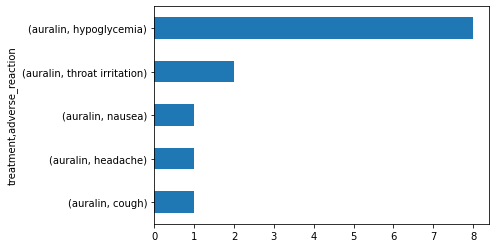

In [63]:
treatments_clean[treatments_clean.treatment=='auralin'].groupby('treatment').adverse_reaction.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='treatment,adverse_reaction'>

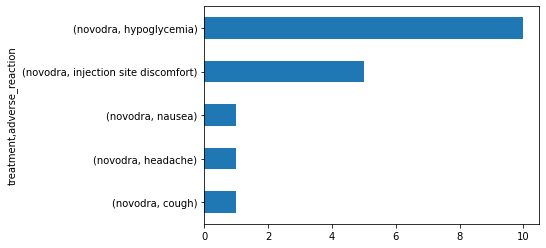

In [64]:
treatments_clean[treatments_clean.treatment=='novodra'].groupby('treatment').adverse_reaction.value_counts().sort_values().plot(kind='barh')

In [65]:
treatments_clean.dose_end.str.strip('u')

0      51
1      42
2      45
3      31
4      41
5      30
6      33
7      61
8      62
9      54
10     62
11     57
12     34
13     45
14     44
15     27
16     39
17     32
18     50
19     39
20     46
21     38
22     50
23     36
24     32
25     43
26     33
27     51
28     23
29     26
30     44
Name: dose_end, dtype: object

In [66]:
# metric 2: pre-trial,post-trial mean insulin dosage change(IU - insulin unit)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u')

In [67]:
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u')
treatments_clean.dose_start

0     42u 
1     32u 
2     31u 
3     25u 
4     32u 
5     22u 
6     27u 
7     52u 
8     55u 
9     48u 
10    51u 
11    46u 
12    26u 
13    40u 
14    42u 
15    32u 
16    41u 
17    29u 
18    54u 
19    38u 
20    49u 
21    41u 
22    49u 
23    39u 
24    38u 
25    41u 
26    34u 
27    55u 
28    22u 
29    28u 
30    42u 
Name: dose_start, dtype: object

In [68]:
treatments_clean.groupby('treatment').dose_end.mean().plot(kind= 'bar')

TypeError: Could not convert  51 42 45 31 41 30 33 61 62 54 62 57 34 to numeric

In [ ]:
treatments_clean.dose_end = treatments_clean.dose_end.astype('float')

In [ ]:
# metric 3: pre-trial/ post trial mean hbA1c change (indicator for diabetes control, should be similar to current injectable insulin standard)
treatments_clean.head()

In [ ]:
# confidence interval for difference in mean hbA1c change between Novodra and Auralin drug as indicator of diabetes control in blood glucose level
treatments_clean.groupby('treatment').hba1c_change.mean().plot(kind= 'bar',title = 'Post trial mean hbA1c change')

In [ ]:
# significance of difference
treatments_clean.groupby('treatment').hba1c_change.mean()

In [ ]:
# noninferior metric of difference between 2 groups was predetermined as upper limit of CI <0.4, 
# so Auralin passed phase 2 trial, both are similarly effective
import statsmodels.api as sm
# n1 = 97
# n2 = 206
# mean_female = 261.75
# mean_male = 239.6
# sd_female = 64.9
# sd_male = 42.65
# sem_female = sd_female / np.sqrt(97)
# sem_male = sd_male / np.sqrt(206)
# mean_d = mean_female - mean_male
# sem_d = (np.sqrt((n1-1)*se_female**2 + (n2-1)*se_male**2)/(n1+n2-2))*(np.sqrt(1/n1 + 1/n2))
# lcb = mean_d - 1.96*sem_d  #lower limit of the CI
# ucb = mean_d + 1.96*sem_d  #upper limit of the CI